In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

df = pd.read_csv("cleaned_data.csv")
df

,Hours Studied,Attendance,Sleep Hours,Tutoring Sessions,Physical Activity,Exam Score,Extracurricular Activities_Yes,Internet Access_Yes,School Type_Public,Parental Involvement,Resource Access,Motivation Level,Family Income,Teacher Quality,Parental Education Level
0,23,84,7,0,3,67,False,True,True,0,2,0,0,1,0
1,19,64,8,2,4,61,False,True,True,0,1,0,1,1,1
2,24,98,7,2,4,74,True,True,True,1,1,1,1,1,2
3,29,89,8,1,4,71,True,True,True,0,1,1,1,1,0
4,19,92,6,3,4,70,True,True,True,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,1,2,68,False,True,True,2,1,1,2,1,0
6603,23,76,8,3,2,69,False,True,True,2,1,1,0,2,0
6604,20,90,6,3,2,68,True,True,True,1,0,0,0,1,2
6605,10,86,6,2,3,68,True,True,False,2,2,2,0,1,0


Multiple Linear Regression Model

<Axes: >

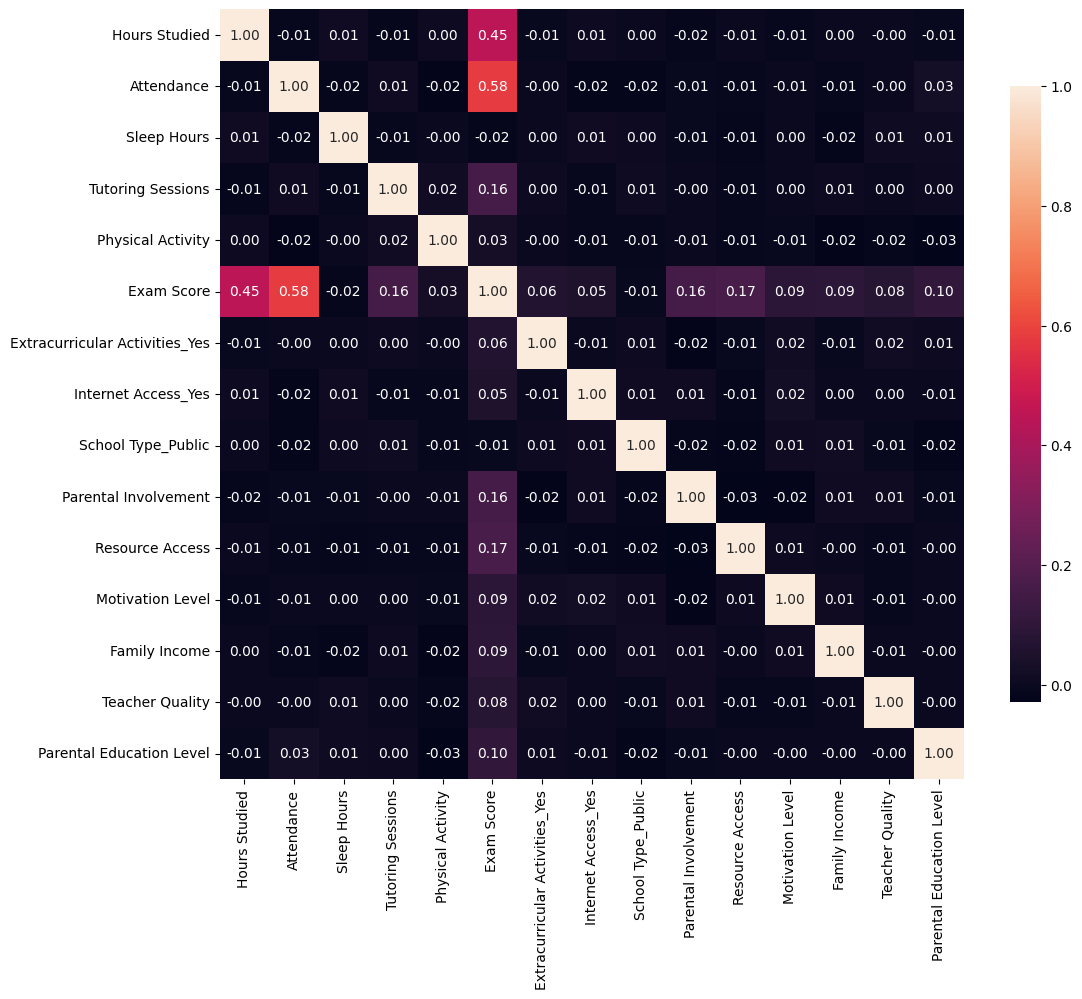

In [8]:
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot = True, fmt = ".2f", cbar_kws={"shrink": .8})

In [9]:
y = df['Exam Score']
X = df[['Hours Studied','Attendance', 'Parental Involvement','Resource Access', 'Family Income', 'Parental Education Level']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [10]:
df.head(5)

,Hours Studied,Attendance,Sleep Hours,Tutoring Sessions,Physical Activity,Exam Score,Extracurricular Activities_Yes,Internet Access_Yes,School Type_Public,Parental Involvement,Resource Access,Motivation Level,Family Income,Teacher Quality,Parental Education Level
0,23,84,7,0,3,67,False,True,True,0,2,0,0,1,0
1,19,64,8,2,4,61,False,True,True,0,1,0,1,1,1
2,24,98,7,2,4,74,True,True,True,1,1,1,1,1,2
3,29,89,8,1,4,71,True,True,True,0,1,1,1,1,0
4,19,92,6,3,4,70,True,True,True,1,1,1,1,2,1


In [11]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
predicted_score = regression.predict([[29, 90, 1, 2, 2, 2]])
print(predicted_score) 

[73.99759444]


c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
y_pred = regression.predict(X_test) 
y_pred

array([63.99754549, 64.07719464, 71.27824284, ..., 69.16730839,
       68.04024412, 66.45817936])

In [14]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.6785053710604798

Random Forest Model

In [15]:
df.head(5)

,Hours Studied,Attendance,Sleep Hours,Tutoring Sessions,Physical Activity,Exam Score,Extracurricular Activities_Yes,Internet Access_Yes,School Type_Public,Parental Involvement,Resource Access,Motivation Level,Family Income,Teacher Quality,Parental Education Level
0,23,84,7,0,3,67,False,True,True,0,2,0,0,1,0
1,19,64,8,2,4,61,False,True,True,0,1,0,1,1,1
2,24,98,7,2,4,74,True,True,True,1,1,1,1,1,2
3,29,89,8,1,4,71,True,True,True,0,1,1,1,1,0
4,19,92,6,3,4,70,True,True,True,1,1,1,1,2,1


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

X = df.drop("Exam Score", axis=1)
y = df[["Exam Score"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


In [ ]:
#absolute error treats big errors and small errors equally therefore it is less sensitive to large errors. There are not so many outliers.
rf = RandomForestRegressor(n_estimators=200, random_state=42, criterion='absolute_error')
model = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.662310460633589

Visuals

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Tutoring Sessions'}>,
        <Axes: title={'center': 'Physical Activity'}>,
        <Axes: title={'center': 'Exam Score'}>],
       [<Axes: title={'center': 'Parental Involvement'}>,
        <Axes: title={'center': 'Resource Access'}>,
        <Axes: title={'center': 'Motivation Level'}>],
       [<Axes: title={'center': 'Family Income'}>,
        <Axes: title={'center': 'Teacher Quality'}>,
        <Axes: title={'center': 'Parental Education Level'}>]],
      dtype=object)

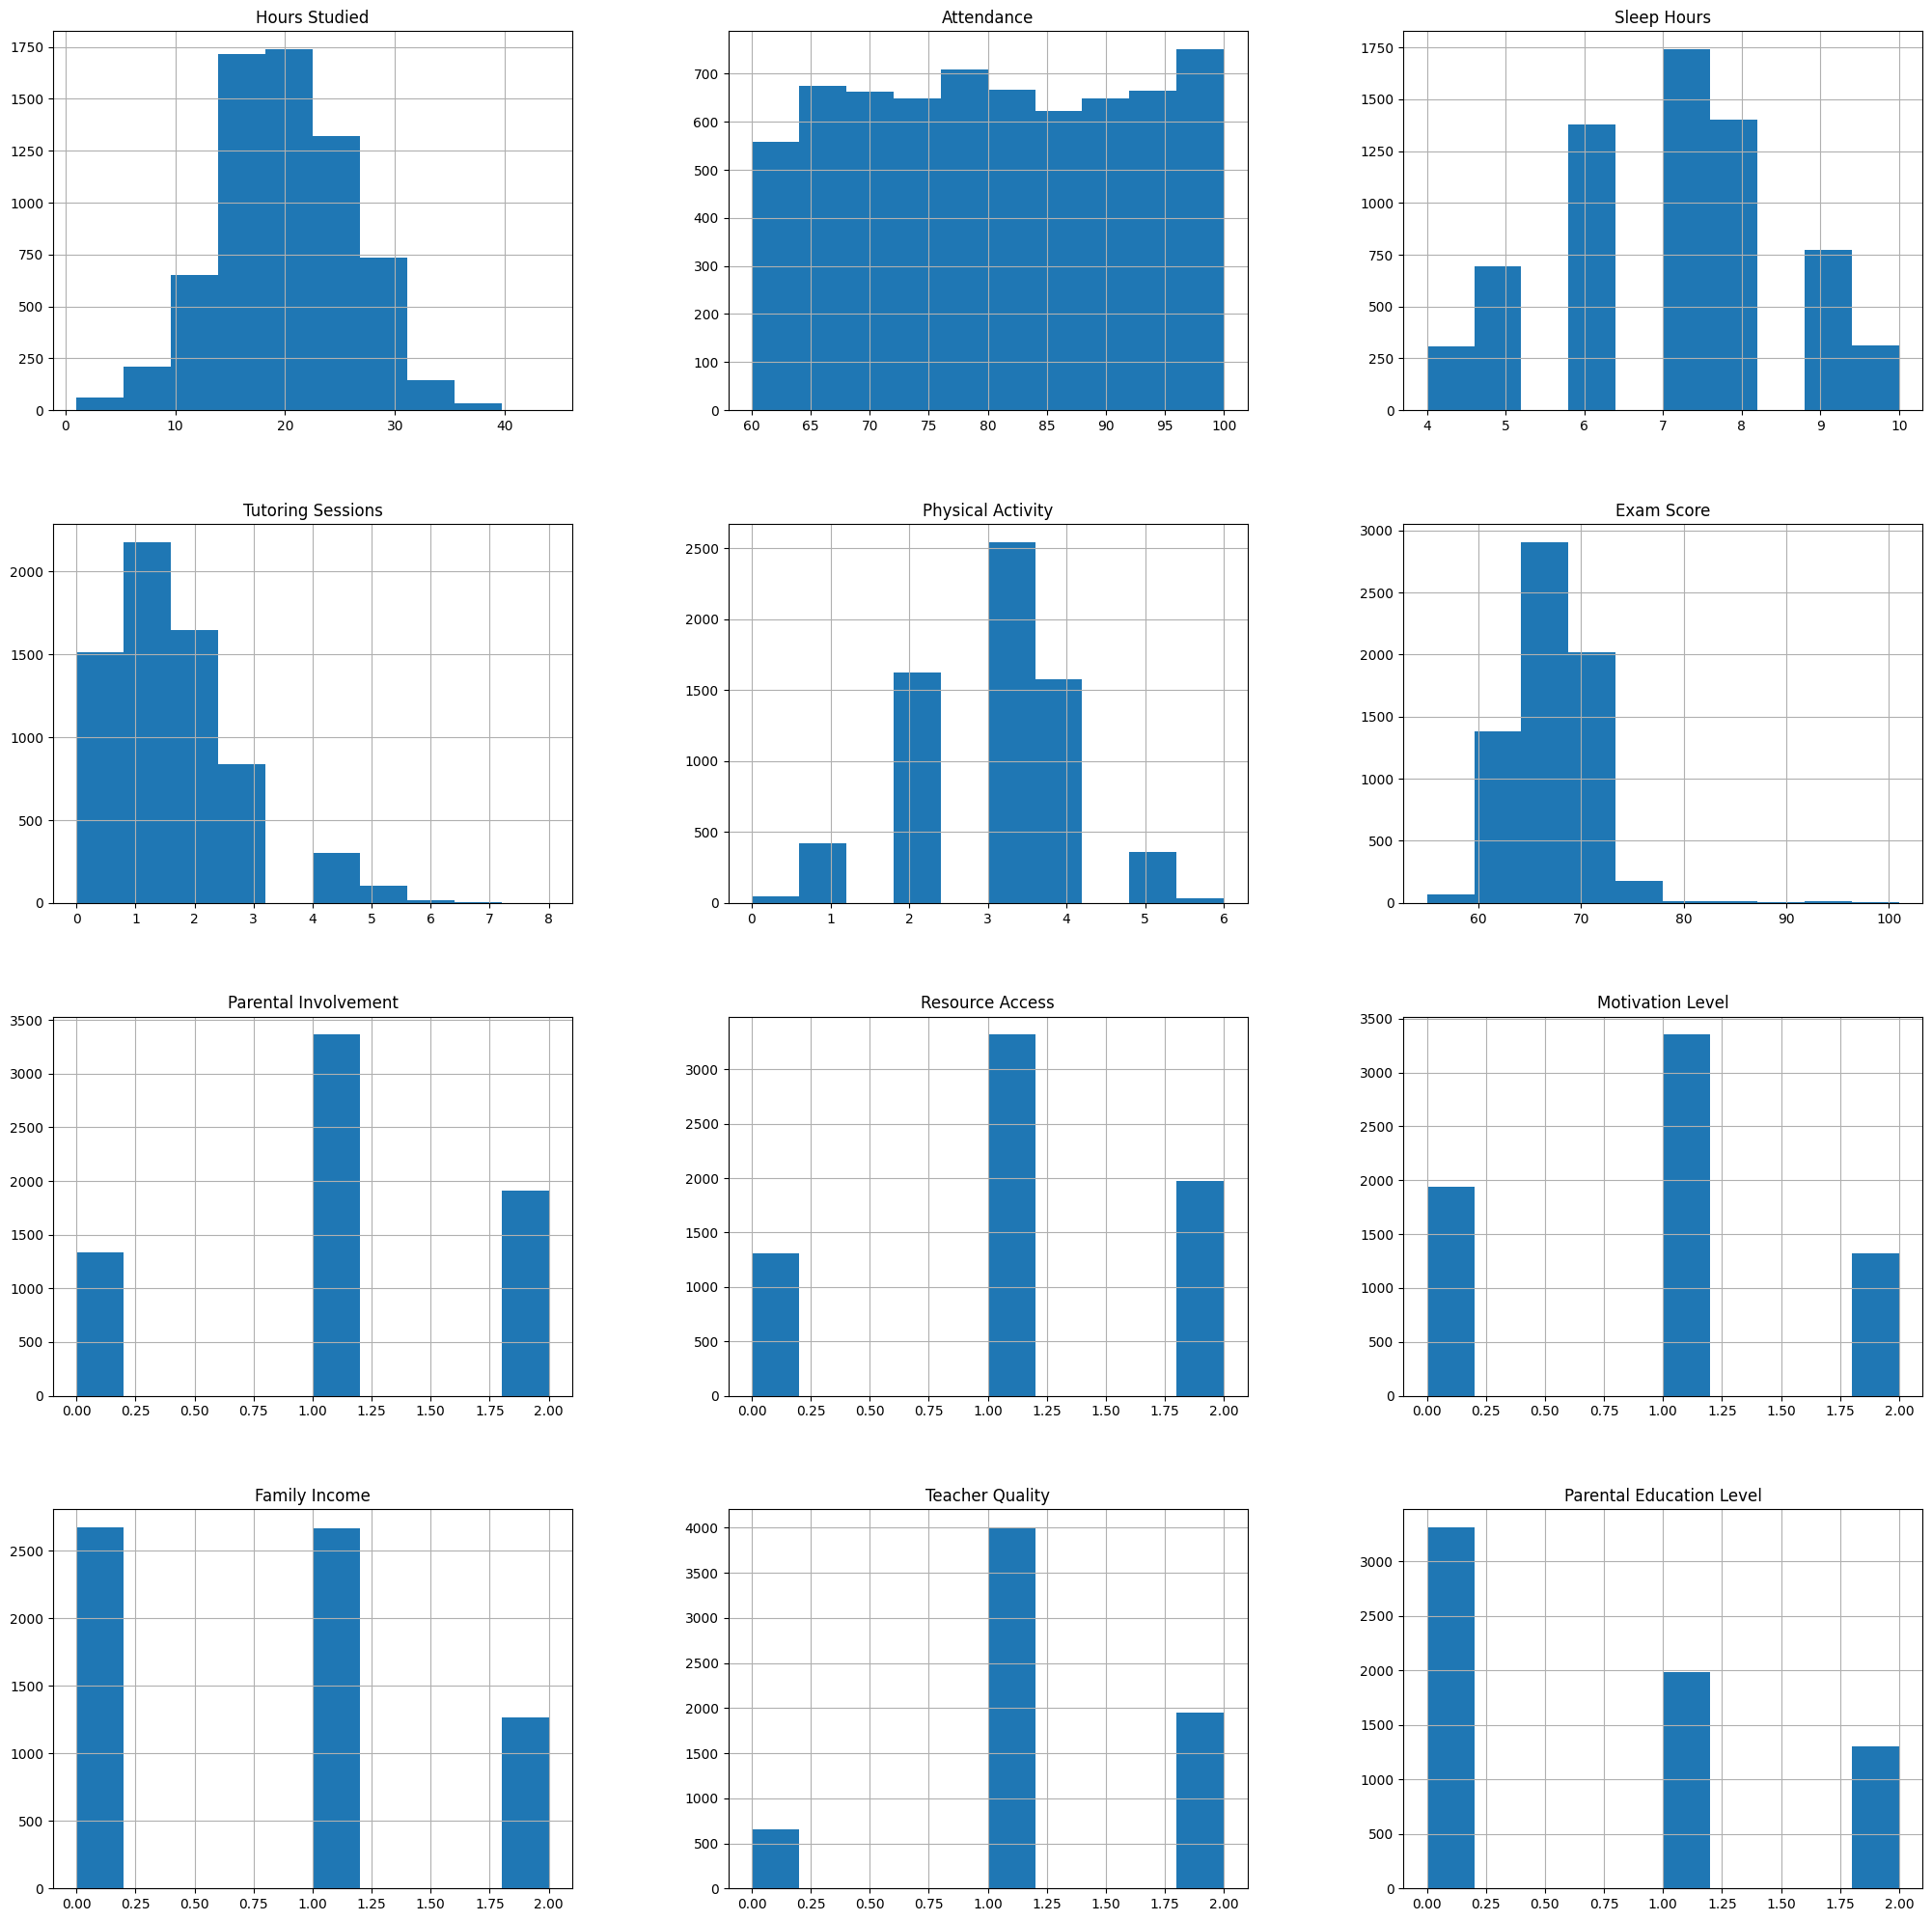

In [31]:
df.hist(figsize=(25,25))

In [32]:
df

,Hours Studied,Attendance,Sleep Hours,Tutoring Sessions,Physical Activity,Exam Score,Extracurricular Activities_Yes,Internet Access_Yes,School Type_Public,Parental Involvement,Resource Access,Motivation Level,Family Income,Teacher Quality,Parental Education Level
0,23,84,7,0,3,67,False,True,True,0,2,0,0,1,0
1,19,64,8,2,4,61,False,True,True,0,1,0,1,1,1
2,24,98,7,2,4,74,True,True,True,1,1,1,1,1,2
3,29,89,8,1,4,71,True,True,True,0,1,1,1,1,0
4,19,92,6,3,4,70,True,True,True,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,1,2,68,False,True,True,2,1,1,2,1,0
6603,23,76,8,3,2,69,False,True,True,2,1,1,0,2,0
6604,20,90,6,3,2,68,True,True,True,1,0,0,0,1,2
6605,10,86,6,2,3,68,True,True,False,2,2,2,0,1,0


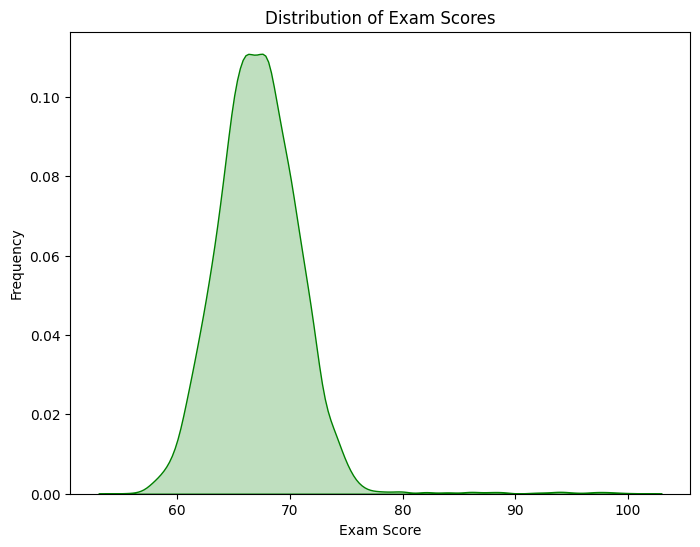

In [43]:
plt.figure(figsize=(8,6))
sns.kdeplot(data = df, color = 'Green', x='Exam Score', fill='True')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

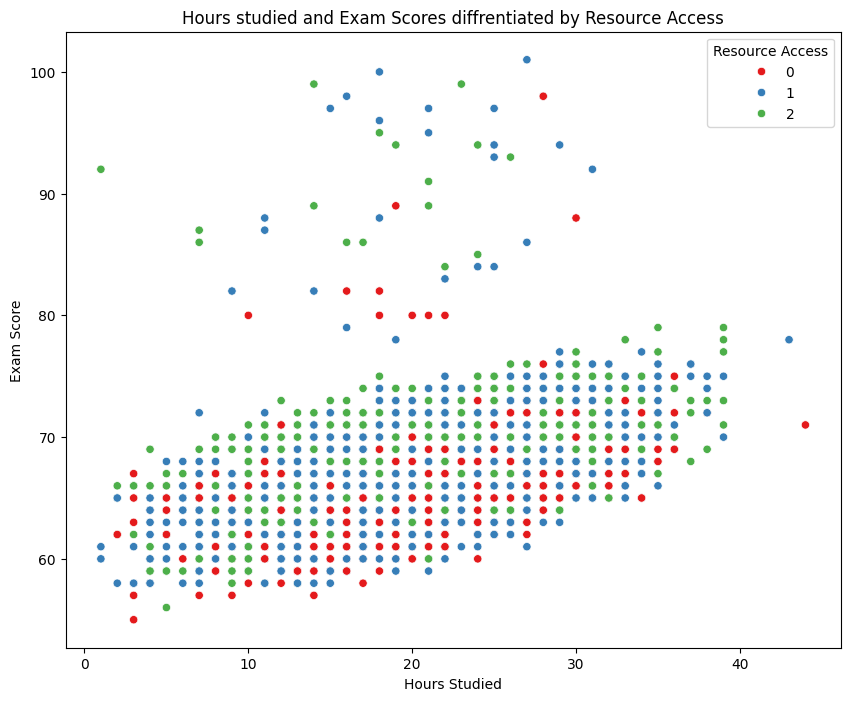

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Hours Studied',y='Exam Score',hue='Resource Access',palette='Set1')
plt.title('Hours studied and Exam Scores diffrentiated by Resource Access')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

C:\Users\tonyp\AppData\Local\Temp\ipykernel_7560\4132404044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tutoring Sessions', y='Exam Score', data=df, palette='Set2')


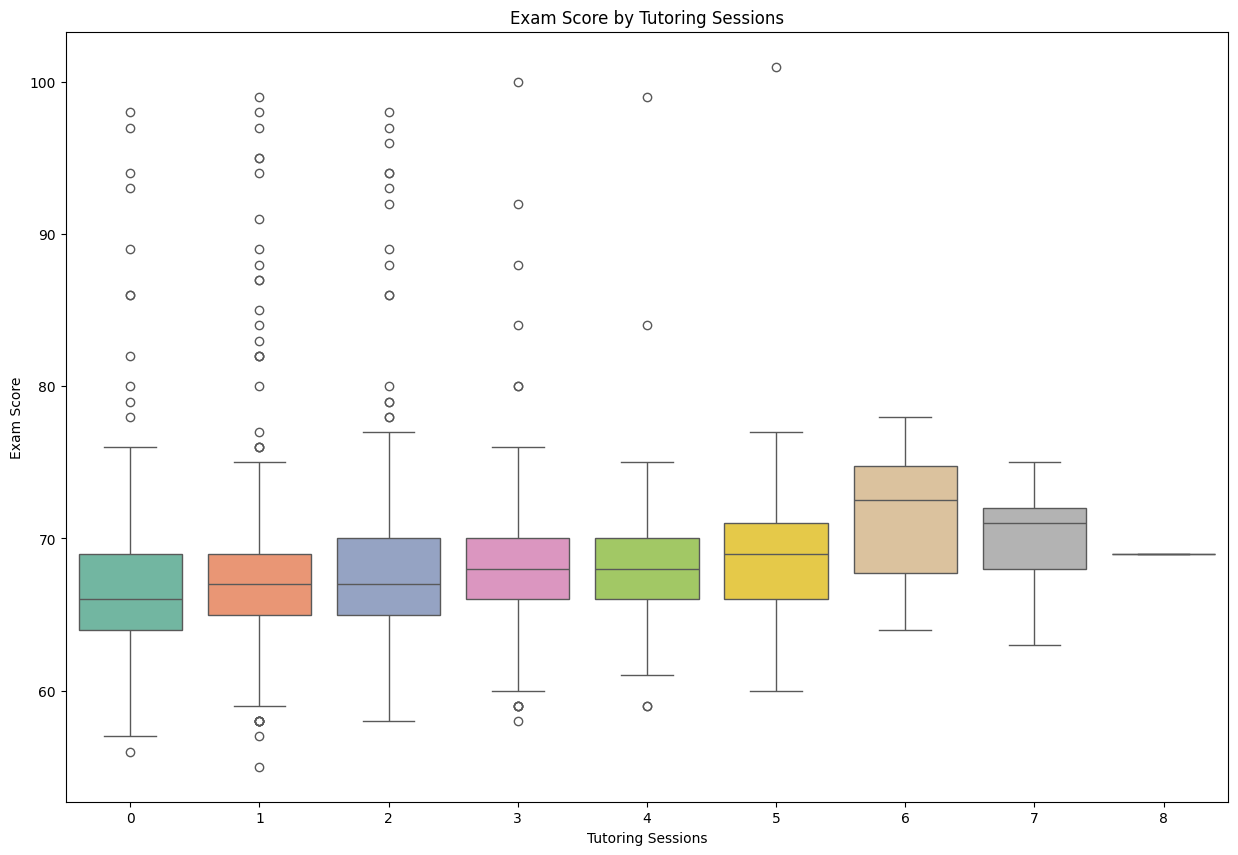

In [53]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tutoring Sessions', y='Exam Score', data=df, palette='Set2')
plt.title('Exam Score by Tutoring Sessions')
plt.show()

C:\Users\tonyp\AppData\Local\Temp\ipykernel_7560\931963696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Family Income', y='Exam Score', data=df, palette='Set2')


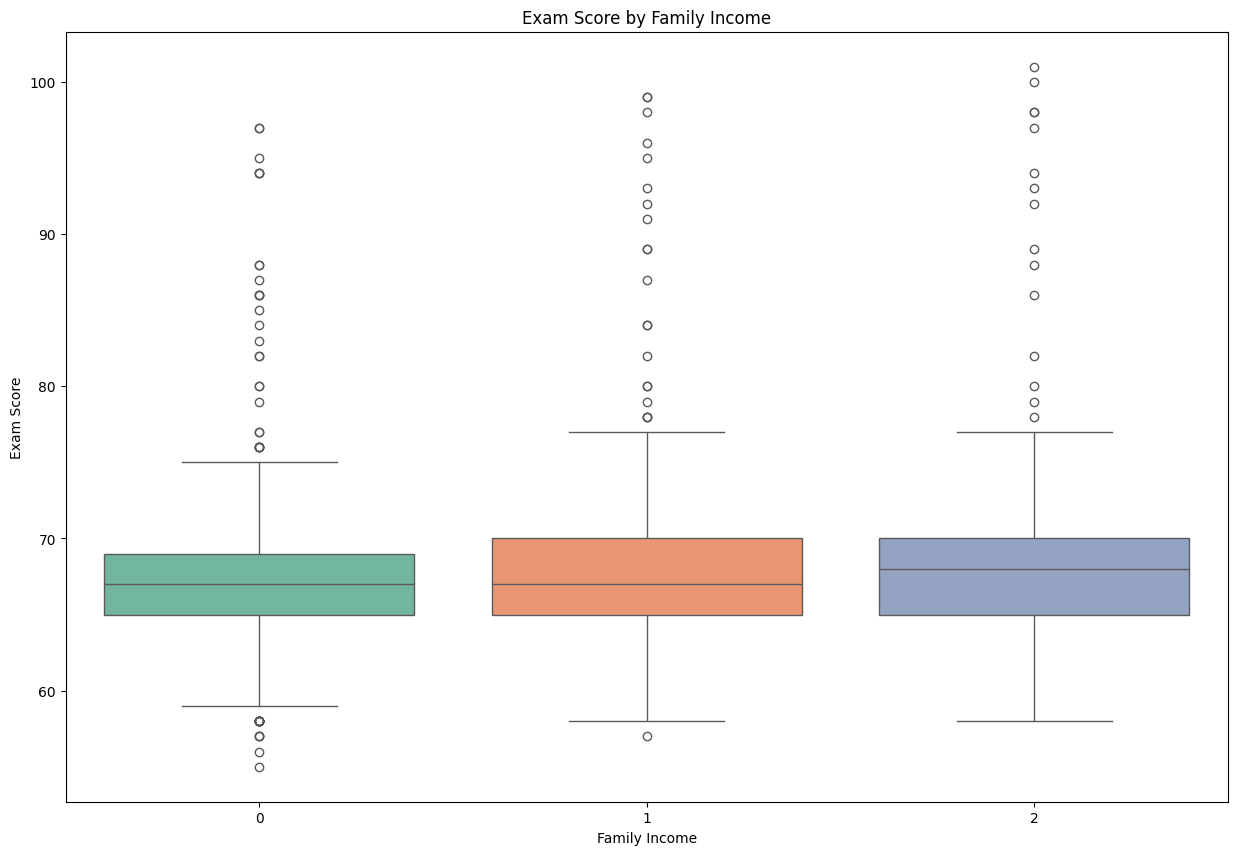

In [54]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Family Income', y='Exam Score', data=df, palette='Set2')
plt.title('Exam Score by Family Income')
plt.show()